# ch6. datasets

[Module: tf.data](https://www.tensorflow.org/api_docs/python/tf/data)

[TensorFlow Datasets](https://www.tensorflow.org/datasets/overview)

[tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)


In [ ]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

# 6.0 tf.data API

tf.data API를 사용하면 단순하고 재사용 가능한 부분에서 복잡한 입력 파이프라인을 구축할 수 있음

* 이미지: 데이터 집계, 이미지 변화, 랜덤 배치 등
* 텍스트: symbol 추출, 사전 생성, 패딩 처리 등

## 6.0.0 tf.data.Dataset 만드는 방법

* data source 는 메모리(list 나 numpy 배열 등) 이나 파일(jpeg 나 csv) 로 부터 dataset 을 생성
* data transformation은 하나 이상의 tf.data.Dataset 객체로부터 dataset 을 생성

## 6.0.1 python list 로 tf.data.Dataset 생성하기

In [ ]:
natural_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(natural_numbers)

In [ ]:
for num in dataset:
  print(num)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


In [ ]:
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [ ]:
dataset2 = tf.data.Dataset.from_tensors(natural_numbers)

In [ ]:
for num in dataset2:
  print(num)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [ ]:
for num in dataset.as_numpy_iterator():
  print(num)

1
2
3
4
5
6
7
8
9
10


In [ ]:
for num in dataset.take(3):
  print(num)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
for num in dataset.filter(lambda x: 5 < x):
  print(num)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


In [ ]:
for num in dataset.map(lambda x: x**2):
  print(num)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)
tf.Tensor(100, shape=(), dtype=int32)


In [ ]:
for num in dataset.shuffle(3):
  print(num)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


In [ ]:
for num in dataset.batch(3):
  print(num)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


In [ ]:
for num in dataset\
          .chche()\ #GPU가 아니라 메모리 올려라
          .map(lambda x: x**2)\
          .filter(lambda x: 5 < x)\
          .shuffle(3)\
          .batch(3):
          .prefetch()
    print(num)

IndentationError: ignored

## Lab 004

> 문제 10
---
1. 1부터 100까지 자연수를 list 로 만듭니다.
2. list 를 이용해서 tf.data.Dataset 을 생성합니다.
3. Dataset에서 홀수만 선택합니다.
4. 랜덤하게 섞어서 5 개씩 50개의 자연수를 모두 출력합니다.

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 LAB 제출하기 게시판"에 비밀글로 제출하세요.

제목양식: [Lab 004 - 문제 10]


In [ ]:
import tensorflow as tf
# 1. 1부터 100까지 자연수를 list 로 만듭니다.
list = [i for i in range(1, 101)]
print(list)

# 2. list 를 이용해서 tf.data.Dataset 을 생성합니다.
dataset = tf.data.Dataset.from_tensor_slices(list)
for num in dataset:
  print(num)

# 3. Dataset에서 홀수만 선택합니다.
for num in dataset.filter(lambda x: x % 2 == 1):
  print(num)

# 4. 랜덤하게 섞어서 5 개씩 50개의 자연수를 모두 출력합니다.
for num in dataset.filter(lambda x: x % 2 == 1).shuffle(10).batch(5):
  print(num)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), 

In [ ]:
numbers = range(1, 100)
for num in tf.data.Dataset.from_tensor_slices(numbers).filter(lambda x: x % 2 != 0).shuffle(10).batch(5):
  print(num)

tf.Tensor([ 1  5 17 25 15], shape=(5,), dtype=int32)
tf.Tensor([13  7 21  9 33], shape=(5,), dtype=int32)
tf.Tensor([31 29 19 43 45], shape=(5,), dtype=int32)
tf.Tensor([49 47 41 51 23], shape=(5,), dtype=int32)
tf.Tensor([11 55 39 63 35], shape=(5,), dtype=int32)
tf.Tensor([53 71 67  3 27], shape=(5,), dtype=int32)
tf.Tensor([69 73 59 75 37], shape=(5,), dtype=int32)
tf.Tensor([81 87 83 85 89], shape=(5,), dtype=int32)
tf.Tensor([93 99 61 97 57], shape=(5,), dtype=int32)
tf.Tensor([65 79 95 77 91], shape=(5,), dtype=int32)


## 6.0.2 numpy array 로 dataset 생성하기

In [ ]:
tensor_dataset_from_numpy = tf.data.Dataset.from_tensors(np.array([1, 2, 3]))
print('tensor_dataset_from_numpy', tensor_dataset_from_numpy)

# tf.data.Dataset 객체는 파이썬의 iterable 임
for elem in tensor_dataset_from_numpy:
  print('element', elem)

tensor_dataset_from_numpy <TensorDataset element_spec=TensorSpec(shape=(3,), dtype=tf.int64, name=None)>
element tf.Tensor([1 2 3], shape=(3,), dtype=int64)


In [ ]:
tensor_slice_dataset2 = tf.data.Dataset.from_tensor_slices(np.array([[1, 2, 3], [4, 5, 6]]))
print('tensor_slice_dataset2', tensor_slice_dataset2)

# tf.data.Dataset 객체는 파이썬의 iterable 임
for elem in tensor_slice_dataset2:
  print('element', elem)

tensor_slice_dataset2 <TensorSliceDataset element_spec=TensorSpec(shape=(3,), dtype=tf.int64, name=None)>
element tf.Tensor([1 2 3], shape=(3,), dtype=int64)
element tf.Tensor([4 5 6], shape=(3,), dtype=int64)


In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
print('images', type(images), images.shape)
print('labels', type(labels), labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
images <class 'numpy.ndarray'> (60000, 28, 28)
labels <class 'numpy.ndarray'> (60000,)


## Lab 005

> 문제 11
---
1. 주어진 코드를 이용하여 fashion_mnist 데이터를 로드합니다. (데이터 형식은 numpy 배열)
2. numpy 배열을 이용해서 tf.data.Dataset 을 생성합니다.
3. Dataset에서 랜덤하게 섞어서 3개의 이미지 shape과 label (바지, 드레스, 셔츠, 신발 등) 을 출력합니다.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 LAB 제출하기 게시판"에 비밀글로 제출하세요.

제목양식: [Lab 005 - 문제 11]


In [ ]:

fashion_mnist = tf.keras.datasets.fashion_mnist
tf.data.Dataset

image (28, 28) tf.Tensor(
[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    ]

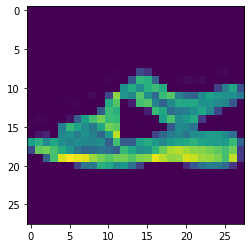

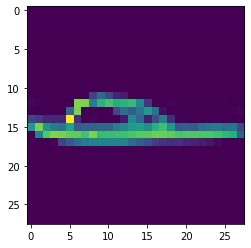

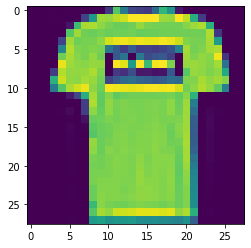

In [ ]:
import matplotlib.pyplot as plt
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
lables = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress', 
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

train_dataset = tf.data.Dataset.from_tensor_slices(train)

for image, label in train_dataset.map(lambda x, y: (x/255, y)).shuffle(100).take(3):
  print('image', image.shape, image)
  print('label', label.shape, label)
  plt.figure()
  plt.imshow(image)

# 6.1 테이블 데이터셋 (엑셀, csv 등)

## 6.1.1 Boston_housing 데이터셋

* 1970년대 보스톤의 주택 가격 데이터
* train, test 는 각각 404개와 102개
* 과제 002

57026/57026 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
13/13 - 0s - loss: 69.0676 - mae: 6.9416 - 37ms/epoch - 3ms/step
4/4 - 0s - loss: 82.0940 - mae: 7.3649 - 21ms/epoch - 5ms/step
4/4 [==============================] - 0s 3ms/step


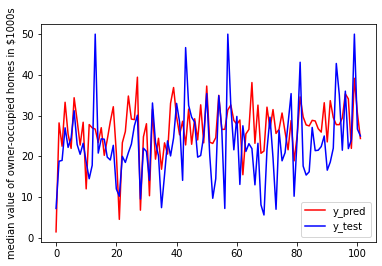

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
##print("x_train.shape=",x_train.shape) # (404, 13)
##print("y_train.shape=",y_train.shape) # (404,)
##print("x_test.shape=", x_test.shape)  # (102, 13)
##print("y_test.shape=", y_test.shape)  # (102,)

model = tf.keras.Sequential()

#1: 1-layer
##model.add(tf.keras.layers.Dense(units=1, input_dim=x_train.shape[1]))# x_train.shape[1]=13

#2:  3-layer
model.add(tf.keras.layers.Dense(units=10, input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae']) #mean absolute error
ret = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

train_loss = model.evaluate(x_train, y_train, verbose=2)
test_loss = model.evaluate(x_test, y_test, verbose=2)

##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

y_pred = model.predict(x_test)
##print("y_pred:", y_pred)

plt.ylabel("median value of owner-occupied homes in $1000s")
plt.plot(y_pred, "r-", label="y_pred")
plt.plot(y_test, "b-", label="y_test")
plt.legend(loc='best')
plt.show()

## 6.1.2 과제 002 Solution (tf.data.Dataset 버전)

(array([ 15.,  49.,  74., 120.,  61.,  31.,  21.,   8.,   8.,  17.]),
 array([-1.891 , -1.4018, -0.9126, -0.4234,  0.0658,  0.5549,  1.0441,
         1.5333,  2.0225,  2.5117,  3.0009]),
 <a list of 10 Patch objects>)

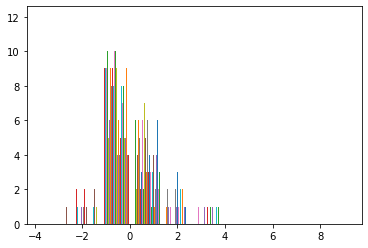

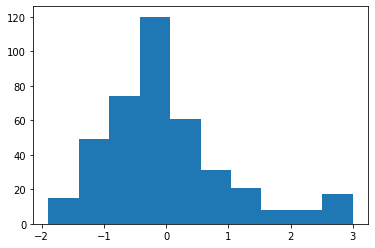

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

def normalize(data):
  mean = tf.reduce_mean(data, axis=0)
  std = tf.math.reduce_std(data, axis=0)
  return (data-mean)/std, mean, std

x_train, x_train_mean, x_train_std = normalize(x_train)
y_train, y_train_mean, y_train_std = normalize(y_train)
x_test, x_test_mean, x_test_std = normalize(x_test)
y_test, x_test_mean, x_test_std = normalize(y_test)

plt.figure()
plt.hist(x_train)

plt.figure()
plt.hist(y_train)

In [ ]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,13)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),  
  tf.keras.layers.Dense(units=1)
])
print(model.summary())
model.compile(optimizer='adam',loss='mse')

AUTOTUNE = tf.data.AUTOTUNE
ds = tf.data.Dataset.from_tensor_slices((tf.expand_dims(x_train, axis=1), tf.expand_dims(y_train, axis=1)))
ds = ds.cache().shuffle(100).batch(32).prefetch(buffer_size=AUTOTUNE)
history = model.fit(ds, epochs=30)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 1, 64)             896       
                                                                 
 dense_102 (Dense)           (None, 1, 32)             2080      
                                                                 
 dense_103 (Dense)           (None, 1, 16)             528       
                                                                 
 dense_104 (Dense)           (None, 1, 1)              17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
13/13 [==============================] - 1s 3ms/step - loss: 0.9219
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5692
Epoch 3/30
13/13 [==

history.params {'verbose': 1, 'epochs': 30, 'steps': 13}
history.history {'loss': [0.9219070076942444, 0.5691948533058167, 0.39819929003715515, 0.27194640040397644, 0.2217879295349121, 0.1935575008392334, 0.1716286838054657, 0.15619096159934998, 0.14222502708435059, 0.12985822558403015, 0.12290996313095093, 0.11621227115392685, 0.11338365823030472, 0.10624916851520538, 0.09634646773338318, 0.09277915954589844, 0.08888159692287445, 0.08709392696619034, 0.08363369852304459, 0.0797327533364296, 0.0765659436583519, 0.07606114447116852, 0.07229076325893402, 0.07154729217290878, 0.0710696429014206, 0.06822628527879715, 0.06305810809135437, 0.062339939177036285, 0.0598883330821991, 0.058264534920454025]}


Text(0, 0.5, 'mse')

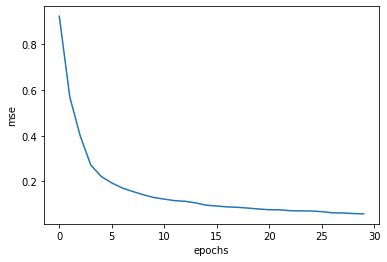

In [ ]:
print('history.params', history.params)
print('history.history', history.history)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('mse')

4/4 [==============================] - 0s 5ms/step


Text(0, 0.5, 'y_pred')

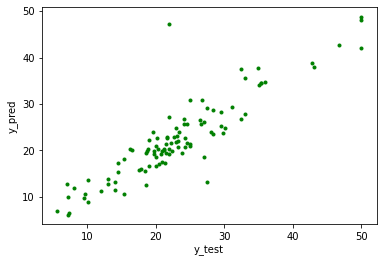

In [ ]:
#ds_test = tf.data.Dataset.from_tensor_slices(tf.expand_dims(x_test, axis=1))
#for d in ds_test:
#  print(d.shape)
y_pred = model.predict(tf.expand_dims(x_test, axis=1))
#plt.plot(y_test, 'b.')
#plt.plot(y_pred.squeeze(), 'r.')
x_test_mean, 
plt.plot(y_test*x_test_std+x_test_mean, y_pred.squeeze()*x_test_std+x_test_mean, 'g.')
plt.xlabel('y_test')
plt.ylabel('y_pred')

# 6.2 이미지 데이터셋

## 6.2.1 MINST 데이터셋

* 0~9까지의 숫자를 손으로 쓴 글자 이미지
* 훈련 데이터 6만개, 테스트 데이터 1만개
* 28 x 28, 1 채널

11490434/11490434 [==============================] - 2s 0us/step
x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)
nlabel: [0 1 2 3 4 5 6 7 8 9]
count: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
# of Class: 10
y_train[:8]= [5 0 4 1 9 2 1 3]


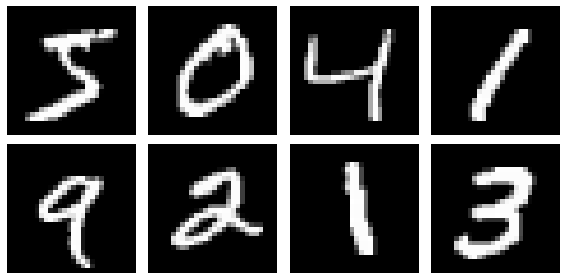

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

#2
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#3: display images
print("y_train[:8]=",y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

In [ ]:
x_train[0]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 3s 1ms/step
confusion_matrix(C): tf.Tensor(
[[5877    0   11    0    5    8    7    5    8    2]
 [   1 6694   11    9    1    5    2    6   13    0]
 [  14    7 5876   12   10    4   11    8   13    3]
 [   7    7   46 5973    3   39    4   20   23    9]
 [   3    9  

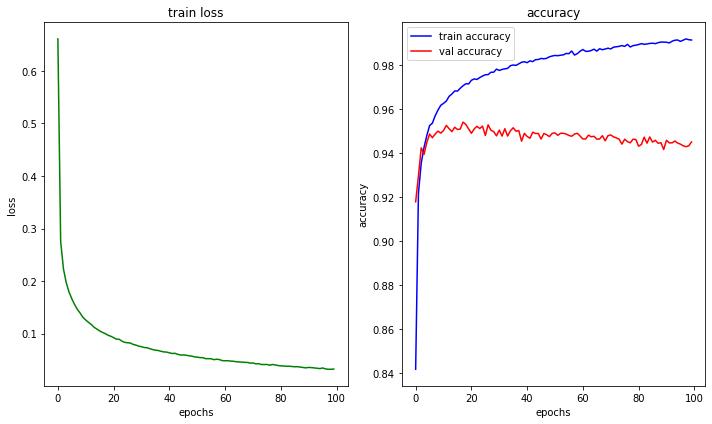

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("y_train.shape=", y_train.shape) # (60000,)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
##print("y_test.shape=",  y_test.shape)  # (10000,)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (60000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#4: x_train.shape = (60000, 28, 28)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (28,28)))
##model.add(tf.keras.layers.Flatten())
##model.add(tf.keras.layers.Dense(units=20))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=10))
##model.add(tf.keras.layers.Activation('softmax'))
##model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
                validation_split=0.2, verbose=0)

#5
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()

## 과제 003

1. 주어진 코드 및 MNIST 데이터셋을 이용하여 tf.data.Dataset 을 생성합니다.
2. 숫자 분류 모델을 학습 시킨 후, x_test 의 1,5,6,75,100 번째 이미지의 숫자를 예측해 보세요.
3. 예측 결과는 해당 이미지와 예측된 숫자를 출력하시오. (예상결과 참조)

*제출*

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (1/3까지)

```python
import tensorflow as tf
import numpy as np

# load mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

```

힌트: 

[tensorflow tutorial](https://www.tensorflow.org/datasets/keras_example)

예상결과:


<img src="https://drive.google.com/uc?id=1sI4SFrPRjZCJDJUwEm1reeJHb5TXXR7c" width="400"/>

## 6.2.2 Fashion_MNIST 데이터셋

* 10 종류의 패션 아이템(신발, 티셔츠 등) 의 이미지
* 훈련 데이터 6만개, 테스트 데이터 1만개
* 28 x 28, 1 채널

<class 'numpy.ndarray'>
x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)
nlabel: [0 1 2 3 4 5 6 7 8 9]
count: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
# of Class: 10
y_train[:8]= [9 0 0 3 0 2 7 2]


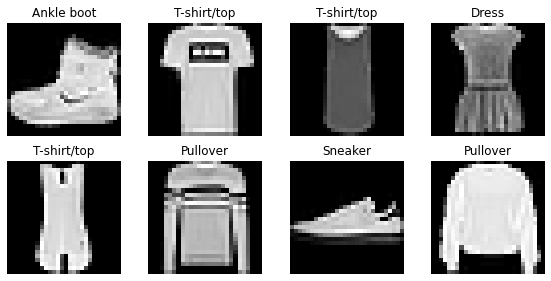

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(type(x_train))
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

#2
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) ) # 10

#3: display images
label = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print("y_train[:8]=", y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    plt.gca().set_title(label[y_train[i]])
    plt.axis("off")
fig.tight_layout()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 20)                15700     
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
120/120 - 1s - loss: 0.8968 - accuracy: 0.7139 - val_loss: 0.5608 - val_accuracy: 0.8061 - 905ms/epoch - 8ms/step
Epoch 2/100
120/120 - 0s - loss: 0.5049 - accuracy: 0.8199 - val_loss: 0.4667 - val_accuracy: 0.8287 - 469ms/epoch - 4ms/step
Epoch 3/100
120/120 - 0s - loss: 0.4521 - accuracy: 0.8353 - v

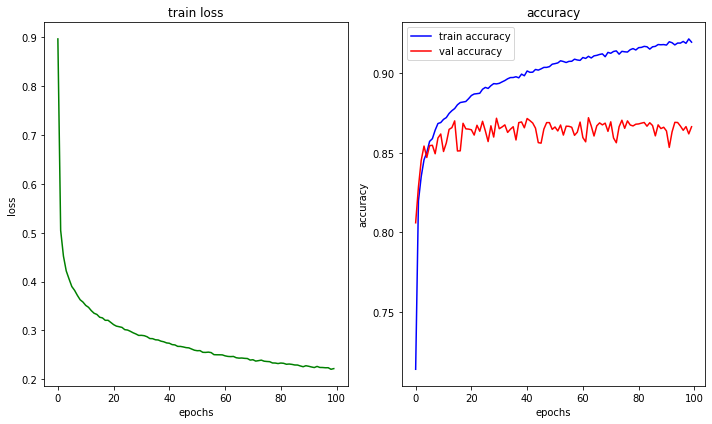

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("y_train.shape=", y_train.shape) # (60000,)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
##print("y_test.shape=",  y_test.shape)  # (10000,)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (60000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#4: x_train.shape = (60000, 28, 28)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
                validation_split=0.2, verbose=2)

#5
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()

## 6.2.3 CIFAR-10 데이터셋

* 10 종류의 사물 (개구리, 트럭 등) 의 컬러 이미지
* 훈련 데이터 5만개, 테스트 데이터 1만개
* 32 x 32, 3 채널(RGB)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape= (50000, 32, 32, 3)
y_train.shape= (50000, 1)
x_test.shape= (10000, 32, 32, 3)
y_test.shape= (10000, 1)
y_train.shape= (50000,)
y_test.shape= (10000,)
nlabel: [0 1 2 3 4 5 6 7 8 9]
count: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
# of Class: 10
y_train[:8]= [6 9 9 4 1 1 2 7]


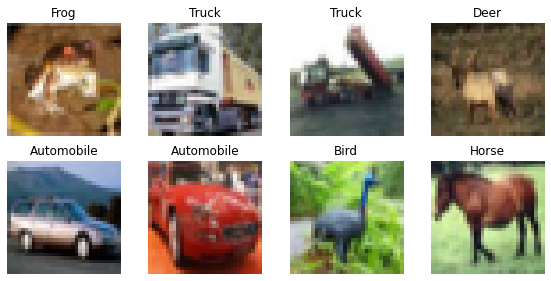

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
print("y_train.shape=", y_train.shape) # (50000, 1)
print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2
y_train = y_train.flatten() 
y_test  = y_test.flatten()
print("y_train.shape=", y_train.shape) # (50000,)
print("y_test.shape=",  y_test.shape)  # (10000,)

#3
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#4
label = ('Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
         'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
print("y_train[:8]=",y_train[:8])

fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    plt.gca().set_title(label[y_train[i]])
    plt.axis("off")
fig.tight_layout()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                153650    
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 - 1s - loss: 1.9252 - accuracy: 0.3223 - val_loss: 1.8549 - val_accuracy: 0.3432 - 1s/epoch - 10ms/step
Epoch 2/100
100/100 - 0s - loss: 1.8135 - accuracy: 0.3622 - val_loss: 1.8446 - val_accuracy: 0.3501 - 440ms/epoch - 4ms/step
Epoch 3/100
100/100 - 1s - loss: 1.7891 - accuracy: 0.3746 - val_loss: 1.8118 - val_accuracy: 0.3615 - 512ms/epoch - 5ms/step
Epoch 4/100
100/100 - 0s - loss: 1.7667 - accuracy: 0.3816 - val_los

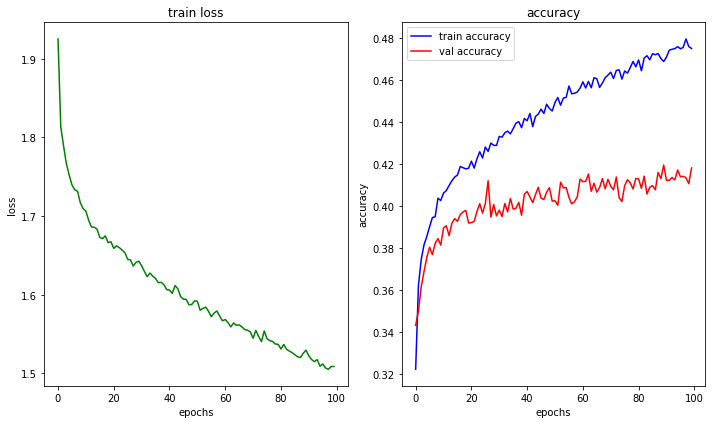

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("y_train.shape=", y_train.shape) # (50000, 1)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
##print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image,  axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean=0, std=1]
x_test = normalize_image(x_test)

#3: flattenning images(x_train, x_test)
# using this flattenning, do not use Flatten layer in model
ndim  = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # 32*32*3=3072
x_train = x_train.reshape(-1, ndim)  # Flatten
x_test  = x_test.reshape(-1,  ndim)  # Flatten
##print("x_train.shape=", x_train.shape) # (50000, 3072)
##print("x_test.shape=",  x_test.shape)  # (10000, 3072)

#4: preprocessing the target(y_train, y_test)
y_train = y_train.flatten() 
y_test  = y_test.flatten()
##print("y_train.shape=", y_train.shape) # (50000,)
##print("y_test.shape=",  y_test.shape)  # (10000,)

# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train) # (50000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#5
model = tf.keras.Sequential()
#x_train.shape = (50000, 3072)
model.add(tf.keras.layers.Dense(units=50,  input_dim = ndim, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# x_train.shape = (50000, 32, 32, 3)
##model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
##model.add(tf.keras.layers.Dense(units=50, activation='sigmoid'))
##model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
               validation_split=0.2, verbose=2)

#6
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()

## 6.2.4 CIFAR-100 데이터셋

* 100 종류의 사물들의 컬러 이미지
* 훈련 데이터 5만개, 테스트 데이터 1만개
* 32 x 32, 3 채널(RGB)

169001437/169001437 [==============================] - 13s 0us/step
x_train.shape= (50000, 32, 32, 3)
y_train.shape= (50000, 1)
x_test.shape= (10000, 32, 32, 3)
y_test.shape= (10000, 1)
y_train.shape= (50000,)
y_test.shape= (10000,)
nlabel: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
count: [2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500
 2500 2500 2500 2500 2500 2500]
# of Class: 20
y_train[:8]= [11 15  4 14  1  5 18  3]


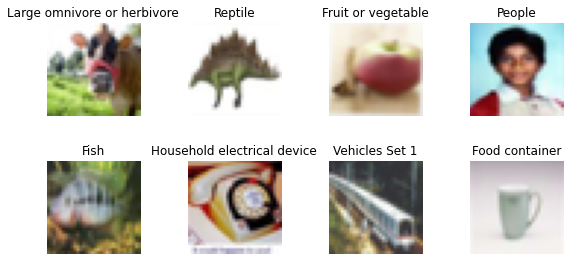

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

#1
mode = 'coarse' # 'fine'
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode=mode)
print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
print("y_train.shape=", y_train.shape) # (50000, 1)
print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2
y_train = y_train.flatten() 
y_test  = y_test.flatten()
print("y_train.shape=", y_train.shape) # (50000,)
print("y_test.shape=",  y_test.shape)  # (10000,)

#3
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#4
#https://github.com/SteffenBauer/KerasTools/blob/master/KerasTools/datasets/decode.py
coarse_label = ('Aquatic mammal', 'Fish', 
               'Flower', 'Food container', 
               'Fruit or vegetable', 'Household electrical device', 
               'Household furniture', 'Insect', 
               'Large carnivore', 'Large man-made outdoor thing', 
               'Large natural outdoor scene', 'Large omnivore or herbivore',
               'Medium-sized mammal', 'Non-insect invertebrate',
               'People', 'Reptile', 
               'Small mammal', 'Tree',
               'Vehicles Set 1', 'Vehicles Set 2')
fine_label = ('Apple', 'Aquarium fish', 'Baby', 'Bear', 'Beaver', 
              'Bed', 'Bee', 'Beetle', 'Bicycle', 'Bottle', 
              'Bowl', 'Boy', 'Bridge', 'Bus', 'Butterfly', 
              'Camel', 'Can', 'Castle', 'Caterpillar', 'Cattle', 
              'Chair', 'Chimpanzee', 'Clock', 'Cloud', 'Cockroach', 
              'Couch', 'Crab', 'Crocodile', 'Cups', 'Dinosaur', 
              'Dolphin', 'Elephant', 'Flatfish', 'Forest', 'Fox', 
              'Girl', 'Hamster', 'House', 'Kangaroo', 'Computer keyboard',
              'Lamp', 'Lawn-mower', 'Leopard', 'Lion', 'Lizard', 
              'Lobster', 'Man', 'Maple', 'Motorcycle', 'Mountain', 
              'Mouse', 'Mushrooms', 'Oak', 'Oranges', 'Orchids', 
              'Otter', 'Palm', 'Pears', 'Pickup truck', 'Pine', 
              'Plain', 'Plates', 'Poppies', 'Porcupine', 'Possum', 
              'Rabbit', 'Raccoon', 'Ray', 'Road', 'Rocket', 
              'Roses', 'Sea', 'Seal', 'Shark', 'Shrew', 
              'Skunk', 'Skyscraper', 'Snail', 'Snake', 'Spider', 
              'Squirrel', 'Streetcar', 'Sunflowers', 'Sweet peppers', 'Table', 
              'Tank', 'Telephone', 'Television', 'Tiger', 'Tractor', 
              'Train', 'Trout', 'Tulips', 'Turtle', 'Wardrobe', 
              'Whale', 'Willow', 'Wolf', 'Woman', 'Worm')

print("y_train[:8]=",y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    if mode == 'coarse':
        title = coarse_label[y_train[i]]
    else: # 'fine'
        title = fine_label[y_train[i]]        
    plt.gca().set_title(title)
    plt.axis("off")
fig.tight_layout()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               307300    
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
Total params: 317,400
Trainable params: 317,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
200/200 - 3s - loss: 4.1178 - accuracy: 0.0983 - val_loss: 3.9150 - val_accuracy: 0.1292 - 3s/epoch - 14ms/step
Epoch 2/200
200/200 - 2s - loss: 3.7774 - accuracy: 0.1508 - val_loss: 3.7575 - val_accuracy: 0.1514 - 2s/epoch - 9ms/step
Epoch 3/200
200/200 - 2s - loss: 3.6364 - accuracy: 0.1702 - val_

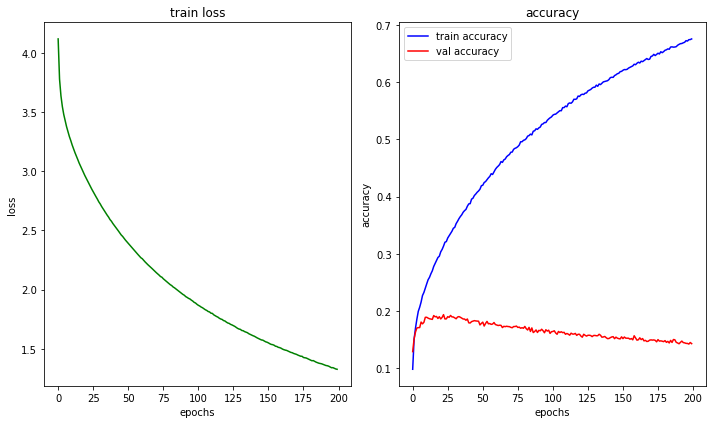

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = cifar100.load_data() #' fine'
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("y_train.shape=", y_train.shape) # (50000, 1)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
##print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image,  axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean=0, std=1]
x_test = normalize_image(x_test)

#3
nlabel, count = np.unique(y_train, return_counts=True)
nClass = len(nlabel) # 'fine': 100, 'coarse':20

#4: preprocessing the target(y_train, y_test)
y_train = y_train.flatten() 
y_test  = y_test.flatten()
##print("y_train.shape=", y_train.shape) # (50000,)
##print("y_test.shape=",  y_test.shape)  # (10000,)

# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train) # (50000, nClass)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, nClass)

#5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=nClass, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=200, batch_size=200, 
               validation_split=0.2, verbose=2)

#6
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()

# 6.3 텍스트 데이터셋

## 6.3.0 텍스트 데이터 전처리

* tokenize
* padding
* word embedding

In [ ]:
import tensorflow as tf

# BTS 의 butter 가사

butter = """
Smooth like butter/
Like a criminal undercover/
Gon' pop like trouble/
Breakin' into your heart like that/
Cool shade stunner/
Yeah, I owe it all to my mother/
Hot like summer/
Yeah, I'm makin' you sweat like that/
Break it down/
"""
print(butter.split("/"))
butter = butter.split("/")
butter = [line.split() for line in butter]
butter

['\nSmooth like butter', '\nLike a criminal undercover', "\nGon' pop like trouble", "\nBreakin' into your heart like that", '\nCool shade stunner', '\nYeah, I owe it all to my mother', '\nHot like summer', "\nYeah, I'm makin' you sweat like that", '\nBreak it down', '\n']


[['Smooth', 'like', 'butter'],
 ['Like', 'a', 'criminal', 'undercover'],
 ["Gon'", 'pop', 'like', 'trouble'],
 ["Breakin'", 'into', 'your', 'heart', 'like', 'that'],
 ['Cool', 'shade', 'stunner'],
 ['Yeah,', 'I', 'owe', 'it', 'all', 'to', 'my', 'mother'],
 ['Hot', 'like', 'summer'],
 ['Yeah,', "I'm", "makin'", 'you', 'sweat', 'like', 'that'],
 ['Break', 'it', 'down'],
 []]

In [ ]:
# 학습에 사용할 단어장을 만들어 보자!
tokenizer1 = tf.keras.preprocessing.text.Tokenizer()

# Updates internal vocabulary based on a list of sequences.
tokenizer1.fit_on_texts(butter)
print('tokenizer1.index_docs', tokenizer1.index_docs)
print('tokenizer1.index_word', tokenizer1.index_word)
print('tokenizer1.word_index', tokenizer1.word_index)
print('tokenizer1.word_docs', tokenizer1.word_docs)
print('tokenizer1.word_counts', tokenizer1.word_counts)
print('tokenizer1.word_counts', sorted(tokenizer1.word_counts.items(), key=lambda x: x[1], reverse=True))


tokenizer1.index_docs defaultdict(<class 'int'>, {5: 1, 6: 1, 1: 6, 9: 1, 7: 1, 8: 1, 11: 1, 12: 1, 10: 1, 14: 1, 2: 2, 16: 1, 15: 1, 13: 1, 17: 1, 19: 1, 18: 1, 3: 2, 23: 1, 20: 1, 22: 1, 25: 1, 4: 2, 24: 1, 21: 1, 26: 1, 27: 1, 29: 1, 30: 1, 28: 1, 31: 1, 32: 1, 33: 1})
tokenizer1.index_word {1: 'like', 2: 'that', 3: 'yeah,', 4: 'it', 5: 'smooth', 6: 'butter', 7: 'a', 8: 'criminal', 9: 'undercover', 10: "gon'", 11: 'pop', 12: 'trouble', 13: "breakin'", 14: 'into', 15: 'your', 16: 'heart', 17: 'cool', 18: 'shade', 19: 'stunner', 20: 'i', 21: 'owe', 22: 'all', 23: 'to', 24: 'my', 25: 'mother', 26: 'hot', 27: 'summer', 28: "i'm", 29: "makin'", 30: 'you', 31: 'sweat', 32: 'break', 33: 'down'}
tokenizer1.word_index {'like': 1, 'that': 2, 'yeah,': 3, 'it': 4, 'smooth': 5, 'butter': 6, 'a': 7, 'criminal': 8, 'undercover': 9, "gon'": 10, 'pop': 11, 'trouble': 12, "breakin'": 13, 'into': 14, 'your': 15, 'heart': 16, 'cool': 17, 'shade': 18, 'stunner': 19, 'i': 20, 'owe': 21, 'all': 22, 'to': 

In [ ]:
# 단어장을 이용해 butter 가사를 숫자로 변경해 보자!
encoded_butter=tokenizer1.texts_to_sequences(butter)
tokenizer1.texts_to_sequences(butter)

[[5, 1, 6],
 [1, 7, 8, 9],
 [10, 11, 1, 12],
 [13, 14, 15, 16, 1, 2],
 [17, 18, 19],
 [3, 20, 21, 4, 22, 23, 24, 25],
 [26, 1, 27],
 [3, 28, 29, 30, 31, 1, 2],
 [32, 4, 33],
 []]

In [ ]:
# OOV: Out-Of-Vocabulary
# 사전에서 빈도수 높은 단어 5개만 사용
# 사전에 없는 단어는? <OOV> 처리!
tokenizer1 = tf.keras.preprocessing.text.Tokenizer(num_words=5, oov_token='<OOV>')
tokenizer1.fit_on_texts(butter)
print('tokenizer1.index_docs', tokenizer1.index_docs)
print('tokenizer1.index_word', tokenizer1.index_word)
print('tokenizer1.word_index', tokenizer1.word_index)
encoded_butter = tokenizer1.texts_to_sequences(butter)
encoded_butter

tokenizer1.index_docs defaultdict(<class 'int'>, {6: 1, 7: 1, 2: 6, 10: 1, 8: 1, 9: 1, 12: 1, 13: 1, 11: 1, 15: 1, 3: 2, 17: 1, 16: 1, 14: 1, 18: 1, 20: 1, 19: 1, 4: 2, 24: 1, 21: 1, 23: 1, 26: 1, 5: 2, 25: 1, 22: 1, 27: 1, 28: 1, 30: 1, 31: 1, 29: 1, 32: 1, 33: 1, 34: 1})
tokenizer1.index_word {1: '<OOV>', 2: 'like', 3: 'that', 4: 'yeah,', 5: 'it', 6: 'smooth', 7: 'butter', 8: 'a', 9: 'criminal', 10: 'undercover', 11: "gon'", 12: 'pop', 13: 'trouble', 14: "breakin'", 15: 'into', 16: 'your', 17: 'heart', 18: 'cool', 19: 'shade', 20: 'stunner', 21: 'i', 22: 'owe', 23: 'all', 24: 'to', 25: 'my', 26: 'mother', 27: 'hot', 28: 'summer', 29: "i'm", 30: "makin'", 31: 'you', 32: 'sweat', 33: 'break', 34: 'down'}
tokenizer1.word_index {'<OOV>': 1, 'like': 2, 'that': 3, 'yeah,': 4, 'it': 5, 'smooth': 6, 'butter': 7, 'a': 8, 'criminal': 9, 'undercover': 10, "gon'": 11, 'pop': 12, 'trouble': 13, "breakin'": 14, 'into': 15, 'your': 16, 'heart': 17, 'cool': 18, 'shade': 19, 'stunner': 20, 'i': 21, '

[[1, 2, 1],
 [2, 1, 1, 1],
 [1, 1, 2, 1],
 [1, 1, 1, 1, 2, 3],
 [1, 1, 1],
 [4, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 1],
 [4, 1, 1, 1, 1, 2, 3],
 [1, 1, 1],
 []]

In [ ]:
# 문장의 길이가 다르므로 일치시켜 보자! 
# (MNIST 이미지 데이터의 모양은 모두 28 x 28)
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_butter=pad_sequences(encoded_butter)
pad_sequences(encoded_butter)
#pad_sequences(encoded_butter, padding='post')

array([[ 0,  0,  0,  0,  0,  5,  1,  6],
       [ 0,  0,  0,  0,  1,  7,  8,  9],
       [ 0,  0,  0,  0, 10, 11,  1, 12],
       [ 0,  0, 13, 14, 15, 16,  1,  2],
       [ 0,  0,  0,  0,  0, 17, 18, 19],
       [ 3, 20, 21,  4, 22, 23, 24, 25],
       [ 0,  0,  0,  0,  0, 26,  1, 27],
       [ 0,  3, 28, 29, 30, 31,  1,  2],
       [ 0,  0,  0,  0,  0, 32,  4, 33],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [ ]:
pad_sequences(encoded_butter, maxlen=6)

array([[ 0,  0,  0,  5,  1,  6],
       [ 0,  0,  1,  7,  8,  9],
       [ 0,  0, 10, 11,  1, 12],
       [13, 14, 15, 16,  1,  2],
       [ 0,  0,  0, 17, 18, 19],
       [21,  4, 22, 23, 24, 25],
       [ 0,  0,  0, 26,  1, 27],
       [28, 29, 30, 31,  1,  2],
       [ 0,  0,  0, 32,  4, 33],
       [ 0,  0,  0,  0,  0,  0]], dtype=int32)

In [ ]:
# Dense Layer 에 입력으로 사용해 보자!
# one-hot encoding
from tensorflow.keras.utils import to_categorical
to_categorical(encoded_butter[0])

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Lab 006

> 문제 12
---
1. 주어진 danawa 맥북 리뷰를 데이터를 tensorflow 를 이용하여 텍스트 전처리 합니다.
2. 먼저, 빈도가 포함된 단어 사전을 구축합니다.
3. 주어진 문장을 단어 사전의 인덱스(숫자)로 변경합니다.
4. 숫자로 변경한 문장의 길이를 동일하게 맞춥니다.(패딩)
5. 주어진 문장을 one-hot 인코딩 합니다.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 LAB 제출하기 게시판"에 비밀글로 제출하세요.

제목양식: [Lab 006 - 문제 12]


In [ ]:
#  주어진 danawa 맥북 리뷰를 데이터를 tensorflow 를 이용하여 텍스트 전처리 

reviews = [
    "8년 정도 사용하던 맥북을 바꿔줬어요. 요즘 휴대폰, 패드가 너무 잘나와서 맥북 쓸 일은 그렇게 많이 없긴 한데 그래도 없으면 불편하니 기변합니다. 프로 13인치 깡통은 에어에 비해 망작이라고들 말하는데 120만원대에 22개월 무이자라면 말이 다르죠ㅎㅎ 불편하다던 터치바도 생각보다 편리한 기능들이 많아서 꽤 마음에 듭니다. 터치 아이디도 편하구요. 전 모델은 팬이 없어서 발열이 심했는데 역시 팬이 있으니 발열도 심하지 않고 좋아요. 쾌적합니다.",
    "어제밤11시50분이 넘어서 주문했는데 오늘오후3시에 받았어요^^배송 너무 빨라서 놀랐고 가격도 할인을 정말 많이 받아서 저렴하게 구입했어요^^ 물건은 말할것도 없이 포장도 꼼꼼하고 아들이 정말 좋아해요^^ 잘쓰겠습니다~ 대박나시고 건강하세요^ 감사합니다",
    "맥북 사실때 주의 하셔야할 사항이 본체에 미세한 전기가 흐르는 사항 입니다. 이유는 접지가 없어서 그렇다고 하네요. 추가로 접지 가능한 플러그를 구매 하셔야 합니다. ㅠㅠ",
    "하이마트는 배송이 빨라서 좋다 기대도 안했는데 빨리 옴 하이마트는 전국 하이마트 지점 재고 네트워크가 잘 되어 있어서 그래서 더 빠른 듯 굿굿 애플은 하이마트",
    "구형 맥북 배터리 교환때문에 고민을 하던 찰나에 좋은 가격에 잘 구입했습니다. 역시 11번가 입니다",
    "슈팅 배송 맞구요. 스페이스그레이 가볍지 않고 너무 예뻐요. 그랜드11절 기다린 보람이 있네요.",
    "인터넷 서핑 동영상 음악 감상용으로 나쁘지않아요대신 영상작업이나 포토샵하기엔 아쉽습니다.",
    "배송도 진짜 빠르고 정말 좋습니다 추천 드려요",
    "좋은상품 저렴하게 잘 구매했습니다 감사합니다",
    "역시 맥북 최고입니다!!",
    "빠른배송에 만족합니다 잘 사용할게요",
    "오 너무 잘샀아요강추해요!"
]

reviews = [i.split() for i in reviews]

# 먼저, 빈도가 포함된 단어 사전을 구축합니다.

tokenizer = tf.keras.preprocessing.text.Tokenizer()


tokenizer.fit_on_texts(reviews)


In [ ]:
reviews = [
    "8년 정도 사용하던 맥북을 바꿔줬어요. 요즘 휴대폰, 패드가 너무 잘나와서 맥북 쓸 일은 그렇게 많이 없긴 한데 그래도 없으면 불편하니 기변합니다. 프로 13인치 깡통은 에어에 비해 망작이라고들 말하는데 120만원대에 22개월 무이자라면 말이 다르죠ㅎㅎ 불편하다던 터치바도 생각보다 편리한 기능들이 많아서 꽤 마음에 듭니다. 터치 아이디도 편하구요. 전 모델은 팬이 없어서 발열이 심했는데 역시 팬이 있으니 발열도 심하지 않고 좋아요. 쾌적합니다.",
    "어제밤11시50분이 넘어서 주문했는데 오늘오후3시에 받았어요^^배송 너무 빨라서 놀랐고 가격도 할인을 정말 많이 받아서 저렴하게 구입했어요^^ 물건은 말할것도 없이 포장도 꼼꼼하고 아들이 정말 좋아해요^^ 잘쓰겠습니다~ 대박나시고 건강하세요^ 감사합니다",
    "맥북 사실때 주의 하셔야할 사항이 본체에 미세한 전기가 흐르는 사항 입니다. 이유는 접지가 없어서 그렇다고 하네요. 추가로 접지 가능한 플러그를 구매 하셔야 합니다. ㅠㅠ",
    "하이마트는 배송이 빨라서 좋다 기대도 안했는데 빨리 옴 하이마트는 전국 하이마트 지점 재고 네트워크가 잘 되어 있어서 그래서 더 빠른 듯 굿굿 애플은 하이마트",
    "구형 맥북 배터리 교환때문에 고민을 하던 찰나에 좋은 가격에 잘 구입했습니다. 역시 11번가 입니다",
    "슈팅 배송 맞구요. 스페이스그레이 가볍지 않고 너무 예뻐요. 그랜드11절 기다린 보람이 있네요.",
    "인터넷 서핑 동영상 음악 감상용으로 나쁘지않아요대신 영상작업이나 포토샵하기엔 아쉽습니다.",
    "배송도 진짜 빠르고 정말 좋습니다 추천 드려요",
    "좋은상품 저렴하게 잘 구매했습니다 감사합니다",
    "역시 맥북 최고입니다!!",
    "빠른배송에 만족합니다 잘 사용할게요",
    "오 너무 잘샀아요강추해요!"
]
reviews = [line.split() for line in reviews]
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Updates internal vocabulary based on a list of sequences.
tokenizer.fit_on_texts(reviews)
print('tokenizer.index_word', tokenizer.index_word)
print('tokenizer.word_index', tokenizer.word_index)
encoded_reviews=tokenizer.texts_to_sequences(reviews)
encoded_reviews=tf.keras.preprocessing.sequence.pad_sequences(encoded_reviews)
for review in encoded_reviews:
  print(tf.keras.utils.to_categorical(review))

tokenizer.index_word {1: '너무', 2: '맥북', 3: '잘', 4: '역시', 5: '정말', 6: '많이', 7: '팬이', 8: '없어서', 9: '않고', 10: '빨라서', 11: '저렴하게', 12: '감사합니다', 13: '하이마트는', 14: '하이마트', 15: '8년', 16: '정도', 17: '사용하던', 18: '맥북을', 19: '바꿔줬어요.', 20: '요즘', 21: '휴대폰,', 22: '패드가', 23: '잘나와서', 24: '쓸', 25: '일은', 26: '그렇게', 27: '없긴', 28: '한데', 29: '그래도', 30: '없으면', 31: '불편하니', 32: '기변합니다.', 33: '프로', 34: '13인치', 35: '깡통은', 36: '에어에', 37: '비해', 38: '망작이라고들', 39: '말하는데', 40: '120만원대에', 41: '22개월', 42: '무이자라면', 43: '말이', 44: '다르죠ㅎㅎ', 45: '불편하다던', 46: '터치바도', 47: '생각보다', 48: '편리한', 49: '기능들이', 50: '많아서', 51: '꽤', 52: '마음에', 53: '듭니다.', 54: '터치', 55: '아이디도', 56: '편하구요.', 57: '전', 58: '모델은', 59: '발열이', 60: '심했는데', 61: '있으니', 62: '발열도', 63: '심하지', 64: '좋아요.', 65: '쾌적합니다.', 66: '어제밤11시50분이', 67: '넘어서', 68: '주문했는데', 69: '오늘오후3시에', 70: '받았어요^^배송', 71: '놀랐고', 72: '가격도', 73: '할인을', 74: '받아서', 75: '구입했어요^^', 76: '물건은', 77: '말할것도', 78: '없이', 79: '포장도', 80: '꼼꼼하고', 81: '아들이', 82: '좋아해요^^', 83: '잘쓰겠습니다~', 84: '대박나시고', 85: '건강하세요^'

## 6.3.1 IMDB 데이터셋

* 영화 리뷰 데이터
* 훈련 데이터 2.5만개, 테스트 데이터 2.5만개
* 긍정/부정

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

#1
##(x_train, y_train), (x_test, y_test) = imdb.load_data() # index_from=3

#2
(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=15, num_words=101)

##print("x_train.shape=",x_train.shape) # (25000,)
##print("y_train.shape=",y_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)
##print("y_test.shape=", y_test.shape)  # (25000,)

#3
##nlabel, count = np.unique(y_train, return_counts=True)
##print("nlabel:", nlabel)
##print("count:",  count)
##print("# of Class:",  len(nlabel) ) # 2

print("max(x_train words):", max(len(x) for x in x_train)) # 2494
print("max(x_test words):",  max(len(x) for x in x_test)) # 2315
print("x_train[0]:", x_train[0])
print("y_train[0]:", y_train[0])

#4: decoding x_train[n], reverse from integers to words
# ref: https://builtin.com/data-science/how-build-neural-network-keras
n = 0
index = imdb.get_word_index()
reverse_index  = dict([(value, key) for (key, value) in index.items()]) 
review = " ".join( [reverse_index.get(i-3, "?") for i in x_train[n]] )
print("review of x_train[{}]:\n{}".format(n, review))

max(x_train words): 2494
max(x_test words): 2315
x_train[0]: [2, 2, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 100, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 17, 2, 38, 2, 2, 2, 2, 50, 16, 2, 2, 2, 19, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 16, 43, 2, 38, 76, 15, 2, 2, 2, 22, 17, 2, 17, 2, 16, 2, 18, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 16, 2, 66, 2, 33, 2, 2, 2, 16, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 16, 82, 2, 2, 2, 2, 2, 2, 15, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 15, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 18, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 18, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 16, 38, 2, 88, 2, 16, 2, 2, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32]
y_train[0]: 1
review of x_train[0]:
? ? film was just ? ? ? ? story ? ? really ? ? ? they ? ? you could just ? ? there ? ? ? an ? ? ? ? ? ? ? ? ? ? ? from ? ? ? ? as ? so ? ? ? ? there was ? ? ? with 

In [ ]:
x_train[0]


[2,
 2,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 2,
 2,
 36,
 2,
 2,
 25,
 100,
 43,
 2,
 2,
 50,
 2,
 2,
 2,
 35,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 39,
 2,
 2,
 2,
 2,
 17,
 2,
 38,
 2,
 2,
 2,
 2,
 50,
 16,
 2,
 2,
 2,
 19,
 2,
 22,
 2,
 2,
 2,
 2,
 2,
 22,
 71,
 87,
 2,
 16,
 43,
 2,
 38,
 76,
 15,
 2,
 2,
 2,
 22,
 17,
 2,
 17,
 2,
 16,
 2,
 18,
 2,
 2,
 62,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 2,
 2,
 2,
 16,
 38,
 2,
 2,
 25,
 2,
 51,
 36,
 2,
 48,
 25,
 2,
 33,
 2,
 22,
 2,
 2,
 28,
 77,
 52,
 2,
 2,
 2,
 16,
 82,
 2,
 2,
 2,
 2,
 2,
 2,
 15,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 2,
 2,
 2,
 2,
 2,
 2,
 88,
 2,
 2,
 15,
 2,
 98,
 32,
 2,
 56,
 26,
 2,
 2,
 2,
 2,
 18,
 2,
 2,
 22,
 21,
 2,
 2,
 26,
 2,
 2,
 2,
 30,
 2,
 18,
 51,
 36,
 28,
 2,
 92,
 25,
 2,
 2,
 2,
 65,
 16,
 38,
 2,
 88,
 2,
 16,
 2,
 2,
 16,
 2,
 2,
 2,
 32,
 15,
 16,
 2,
 19,
 2,
 32]

In [63]:
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words= 10 # maximum integer index + 1

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4: each vector length: top_words = 10
output_vector = tokenizer.sequences_to_matrix(sequences) # mode='binary'
print("output_vector.shape=", output_vector.shape) # (2, 10)
print(output_vector)

tokenizer.word_index: {'this': 1, 'is': 2, 'a': 3, 'film': 4, 'not': 5}
sequences: [[1, 2, 3, 4], [1, 2, 5, 3, 4]]
output_vector.shape= (2, 10)
[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]]


In [ ]:
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words    = 10  # maximum integer index + 1
max_words    = 6  # sequences.shape[1]
vecor_length = 3  # dimension of the dense embedding

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, max_words)
print('sequences.shape=', sequences.shape)
print("sequences:", sequences)

#5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words, output_dim=vecor_length))
##model.add(tf.keras.layers.Flatten()) # output_vector.shape = (2, 18)
model.summary()

#6
output_vector = model.predict(sequences)
print("output_vector.shape:", output_vector.shape )
print("output_vector:", output_vector )

tokenizer.word_index: {'this': 1, 'is': 2, 'a': 3, 'film': 4, 'not': 5}
sequences: [[1, 2, 3, 4], [1, 2, 5, 3, 4]]
sequences.shape= (2, 6)
sequences: [[0 0 1 2 3 4]
 [0 1 2 5 3 4]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 3)           30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 35ms/step
output_vector.shape: (2, 6, 3)
output_vector: [[[ 0.0186  0.0226 -0.0458]
  [ 0.0186  0.0226 -0.0458]
  [ 0.0134 -0.0299  0.0152]
  [-0.0369 -0.0326  0.0285]
  [ 0.0149  0.0325  0.0048]
  [-0.0008 -0.0498 -0.0214]]

 [[ 0.0186  0.0226 -0.0458]
  [ 0.0134 -0.0299  0.0152]
  [-0.0369 -0.0326  0.0285]
  [ 0.0272  0.0443  0.0206]
  [ 0.0149  0.0325  0.004

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2: binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (25000, 1000)
##print("x_test.shape=", x_test.shape)  # (25000, 1000)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = top_words, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=1280, verbose=0)

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                10010     
                                                                 
 dense_12 (Dense)            (None, 2)                 22        
                                                                 
Total params: 10,032
Trainable params: 10,032
Non-trainable params: 0
_________________________________________________________________
782/782 - 2s - loss: 0.1690 - accuracy: 0.9227 - 2s/epoch - 2ms/step
782/782 - 1s - loss: 0.8815 - accuracy: 0.8111 - 1s/epoch - 2ms/step


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 10)           10000     
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                10010     
                                                                 
 dense_14 (Dense)            (None, 2)                 22        
                                                                 
Total params: 20,032
Trainable params: 20,032
Non-trainable params: 0
_________________________________________________________________


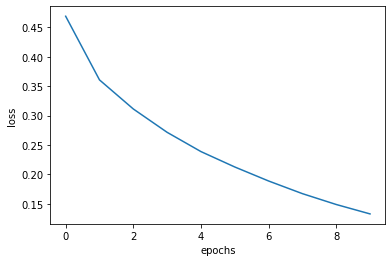

782/782 - 2s - loss: 0.0897 - accuracy: 0.9766 - 2s/epoch - 2ms/step
782/782 - 1s - loss: 0.7458 - accuracy: 0.7773 - 1s/epoch - 2ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2
max_words = 100
x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=max_words)
####print("x_train.shape=",x_train.shape) # (25000, 100)
####print("x_test.shape=", x_test.shape)  # (25000, 100)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
vecor_length = 10   # dimension of the dense embedding
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words,
                                    output_dim=vecor_length,
                                    input_length=max_words))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

## 6.3.2 Reuters 데이터셋

* 로이터 뉴스 기사
* 훈련 데이터 약 9천개, 테스트 데이터 약 2천개
* 46 종류의 카테고리

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = reuters.load_data()

#2
##(x_train, y_train), (x_test, y_test) = reuters.load_data(skip_top=15, num_words=101)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("y_train.shape=",y_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)
##print("y_test.shape=", y_test.shape)  # (2246,)

#3
##nlabel, count = np.unique(y_train, return_counts=True)
##print("nlabel:", nlabel)
##print("count:",  count)
##print("# of Class:",  len(nlabel) ) # 46 

##print("max(x_train words):", max(len(x) for x in x_train))# 2376
##print("max(x_test words):",  max(len(x) for x in x_test)) # 1032

#https://github.com/SteffenBauer/KerasTools/blob/master/KerasTools/datasets/decode.py
label = ('cocoa','grain','veg-oil','earn','acq','wheat','copper','housing',
              'money-supply','coffee','sugar','trade','reserves','ship','cotton',
              'carcass','crude','nat-gas','cpi','money-fx','interest','gnp',
              'meal-feed','alum','oilseed','gold','tin','strategic-metal',
              'livestock','retail','ipi','iron-steel','rubber','heat','jobs',
              'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead')
##print("x_train[0]:", x_train[0])

#4: decoding x_train[n], reverse from integers to words
# 0, 1, 2: 'padding', 'start of sequence', and 'unknown word'
n = 0 # n = 584, it's cocoa news
print("y_train[{}]={}".format(n, y_train[n]))
print("News label: {}".format(label[y_train[n]]))

index = reuters.get_word_index()
reverse_index  = dict([(value, key) for (key, value) in index.items()]) 
review = " ".join( [reverse_index.get(i-3, "?") for i in x_train[n]] )
print("review of x_train[{}]:\n{}".format(n, review))

2110848/2110848 [==============================] - 0s 0us/step
y_train[0]=3
News label: earn
550378/550378 [==============================] - 0s 0us/step
review of x_train[0]:
? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)

#2: binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (8982, 1000)
##print("x_test.shape=", x_test.shape)  # (2246, 1000)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = top_words, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=46, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=2)
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                10010     
                                                                 
 dense_19 (Dense)            (None, 46)                506       
                                                                 
Total params: 10,516
Trainable params: 10,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 - 1s - loss: 2.0029 - accuracy: 0.5507 - 509ms/epoch - 7ms/step
Epoch 2/100
71/71 - 0s - loss: 1.2696 - accuracy: 0.7027 - 137ms/epoch - 2ms/step
Epoch 3/100
71/71 - 0s - loss: 1.0534 - accuracy: 0.7502 - 124ms/epoch - 2ms/step
Epoch 4/100
71/71 - 0s - loss: 0.9247 - accuracy: 0.7830 - 142ms/epoch - 2ms/step
Epoch 5/100
71/71 - 0s - loss: 0.8255 - accuracy: 0.8106 - 119ms/epoch - 2ms/step
Epoch 6/100
71/71 - 0s - loss: 0.750

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)
 
#2
max_words = 100
x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=max_words)
####print("x_train.shape=",x_train.shape) # (8982, 100)
####print("x_test.shape=", x_test.shape)  # (2246, 100)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
vecor_length = 10    # dimension of the dense embedding
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words,
                                    output_dim=vecor_length,
                                    input_length=max_words))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=46, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=0)
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 10)           10000     
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_20 (Dense)            (None, 10)                10010     
                                                                 
 dense_21 (Dense)            (None, 46)                506       
                                                                 
Total params: 20,516
Trainable params: 20,516
Non-trainable params: 0
_________________________________________________________________
281/281 - 0s - loss: 0.1936 - accuracy: 0.9469 - 325ms/epoch - 1ms/step
71/71 - 0s - loss: 3.9898 - accuracy: 0.5980 - 75ms/epoch - 1ms/step
